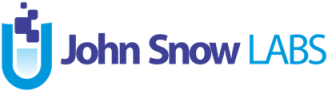

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/misc/Evaluation_Metrics.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest 

In [1]:
!pip install "langtest[openai,transformers]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [3]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

## Robustness testing of LLMs with LangTest

Robustness testing aims to evaluate the ability of a model to maintain consistent performance when faced with various perturbations or modifications in the input data. For LLMs, this involves understanding how changes in capitalization, punctuation, typos, contractions, and contextual information affect their prediction performance.

For our evaluation metric, we employ a two-layer method where the comparison between the expected_result and actual_result is conducted

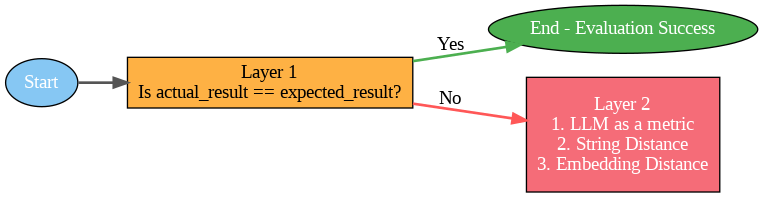

- Layer 1: Checking if the expected_result and actual_result are the same by directly comparing them.

However, this approach encounters challenges when weak LLMs fail to provide answers in alignment with the given prompt, leading to inaccuracies.

- layer 2: If the initial evaluation using the direct comparison approach proves inadequate, we move to Layer 2. we provide three alternative options for evaluation: String distance, Embedding distance, or utilizing LLMs as evaluators.


This dual-layered approach enhances the robustness of our evaluation metric, allowing for adaptability in scenarios where direct comparisons may fall short.

## Embedding distance

### Embedding Models

We offers a range of embedding models from different hubs, with two default models preconfigured:

- **OpenAI Hub:**
  - Default Model: "text-embedding-ada-002"

- **HuggingFace Hub:**
  - Default Model: "sentence-transformers/all-mpnet-base-v2"

Users can specify the desired embedding model and hub to generate embeddings for the `expected_result` and `actual_result`. These embeddings can then be compared using various distance metrics defined in the configuration.

### Distance Metrics for Comparing Embeddings

When comparing embeddings, it's crucial to use the appropriate distance metric. The library supports several distance metrics for this purpose:

- **cosine:** Cosine similarity measures the cosine of the angle between two vectors. Values range from -1 (perfectly dissimilar) to 1 (perfectly similar), with 0 indicating orthogonality.
  - Default Threshold: 0.80
  - Comparison Function: `cosine_similarity >= threshold`

- **euclidean:** Euclidean distance measures the straight-line distance between two points in Euclidean space. It is a non-negative value, with larger values indicating greater dissimilarity and smaller values indicating greater similarity.
  - Default Threshold: 0.45
  - Comparison Function: `euclidean_distance <= threshold`

- **manhattan:** Manhattan distance measures the sum of the absolute differences between the coordinates of two points. It provides a measure of similarity based on the number of steps required to move from one point to another in a grid-like path.
  - Default Threshold: 4.5
  - Comparison Function: `manhattan_distance <= threshold`

- **chebyshev:** Chebyshev distance measures the maximum absolute difference between coordinates of two points. It provides a measure of similarity based on the greatest difference between any dimension.
  - Default Threshold: 0.10
  - Comparison Function: `chebyshev_distance <= threshold`

- **hamming:** Hamming distance measures the fraction of differing elements in two binary vectors. It provides a measure of similarity based on the proportion of differing bits.
  - Default Threshold: 0.50
  - Comparison Function: `hamming_distance <= threshold`

Users have the flexibility to change the threshold according to their specific needs by providing it from the configuration. This allows for fine-tuning the comparison process based on their application requirements.

### Configuration Structure

To configure your embedding models and evaluation metrics, you can use a YAML configuration file. The configuration structure includes:

- `model_parameters` specifying model-related parameters.
- `evaluation` setting the evaluation `metric`, `distance`, and `threshold`.
- `embeddings` allowing you to choose the embedding `model` and `hub`.
- `tests` defining different test scenarios and their `min_pass_rate`.

Here's an example of the configuration structure:

```yaml
model_parameters:
  temperature: 0.2
  max_tokens: 64

evaluation:
  metric: embedding_distance
  distance: cosine
  threshold: 0.8

embeddings:
  model: text-embedding-ada-002
  hub: openai

tests:
  defaults:
    min_pass_rate: 1.0

  robustness:
    add_typo:
      min_pass_rate: 0.70
    lowercase:
      min_pass_rate: 0.70
```

➤ NOTE: These threshold values are experimental and may not be accurate enough to determine whether the model is correct or incorrect. You have to decide the threshold values by experimentation, as different models give different embeddings, and the results will vary depending on the chosen embedding model. Additionally, it's essential to choose metrics that align with your specific use cases for more accurate evaluation.

### Set environment for OpenAI

In [4]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## Using Openai embeddings

### Setup and Configure Harness

In [5]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"CommonsenseQA",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [6]:
harness.configure(
{
 "evaluation": {"metric":"embedding_distance","distance":"cosine","threshold":0.9},
 "embeddings":{"model":"text-embedding-ada-002","hub":"openai"},
 'tests': {'defaults': {'min_pass_rate': 0.65},

           'robustness': {'add_ocr_typo': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60}
                         }
          }
 }

)

{'evaluation': {'metric': 'embedding_distance',
  'distance': 'cosine',
  'threshold': 0.9},
 'embeddings': {'model': 'text-embedding-ada-002', 'hub': 'openai'},
 'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'add_ocr_typo': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6}}}}

Here we have configured the harness to perform two robustness tests (add_ocr_typo and dyslexia_word_swap) and defined the minimum pass rate for each test.

In [7]:
harness.data= harness.data[:5]

### Generating the test cases.

In [8]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]
[W010] - Test 'dyslexia_word_swap': 1 samples removed out of 5



harness.generate() method automatically generates the test cases (based on the provided configuration)


In [9]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,add_ocr_typo,-,"The townhouse was a hard sell for the realtor, it was right next to a high rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs",-,"t^ie townhouse was a h^ard sel1 f^r the realtor, i^t was rlght ncxt t^o a hig^h rlse wliat?\nA. suburban develoi)ment\nB. apartment hiiilding\nC. bus ftop\nD. michigan\nE. suburbs"
1,robustness,add_ocr_typo,-,There is a star at the center of what group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system,-,th6re is a ftar at t^e ccnter of whai group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer lpace\nD. constellation\nE. solar fyftem
2,robustness,add_ocr_typo,-,What were the kids doing as they looked up at the sky and clouds?\nA. ponder\nB. become adults\nC. wonder about\nD. open door\nE. distracting,-,v/hat were t^he kids doing as tbey looked up at the sky a^nd clouds?\nA. ponder\nB. becomc adults\nC. wondcr aboui\nD. o])en dooi\nE. distracting
3,robustness,add_ocr_typo,-,The person taught an advanced class only for who?\nA. own house\nB. own self\nC. wonderful memories\nD. know truth\nE. intelligent children,-,tbe x)erson taught an advanced claff on1y f^r vHo?\nA. o^wn houie\nB. own self\nC. wonderful memories\nD. kno»v trutb\nE. intelligent children
4,robustness,add_ocr_typo,-,What is a likely consequence of ignorance of rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage,-,v\hat is a likcly consequence of ignorance of rules?\nA. fiud trnth\nB. hostility\nC. bliss\nD. accidents\nE. damage
5,robustness,dyslexia_word_swap,-,"The townhouse was a hard sell for the realtor, it was right next to a high rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs",-,"The townhouse was a hard sell four the realtor, it was write next too a hi rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs"
6,robustness,dyslexia_word_swap,-,There is a star at the center of what group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system,-,There is a star at the center off what group off celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system
7,robustness,dyslexia_word_swap,-,The person taught an advanced class only for who?\nA. own house\nB. own self\nC. wonderful memories\nD. know truth\nE. intelligent children,-,The person taught an advanced class only four who?\nA. own house\nB. own self\nC. wonderful memories\nD. no truth\nE. intelligent children
8,robustness,dyslexia_word_swap,-,What is a likely consequence of ignorance of rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage,-,What is a likely consequence off ignorance off rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage


harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [10]:
harness.run()

Running testcases... : 100%|██████████| 9/9 [00:22<00:00,  2.53s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### saving model reponse (expected_result and actual_result)

In [13]:
harness.save(save_dir=r"saved_model_reponse", include_generated_results =True)

**Note:**
- Make sure to save your model response before experimenting with different evaluation methods.
- Execute `harness.save(save_dir=r"saved_model_response", include_generated_results=True)` before running `harness.generated_results()`.
  
  **Important:** If you save the model response after executing `harness.generated_results()`, ensure to set `ran_pass` to `False` for each sample if you intend to reevaluate the model with the saved response.


### Generated Results

In [14]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,eval_score,pass
0,robustness,add_ocr_typo,-,"The townhouse was a hard sell for the realtor, it was right next to a high rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs",-,"t^ie townhouse was a h^ard sel1 f^r the realtor, i^t was rlght ncxt t^o a hig^h rlse wliat?\nA. suburban develoi)ment\nB. apartment hiiilding\nC. bus ftop\nD. michigan\nE. suburbs",B. Apartment building,B. Apartment building,1.000000,True
1,robustness,add_ocr_typo,-,There is a star at the center of what group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system,-,th6re is a ftar at t^e ccnter of whai group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer lpace\nD. constellation\nE. solar fyftem,D. constellation,D. constellation,1.000000,True
2,robustness,add_ocr_typo,-,What were the kids doing as they looked up at the sky and clouds?\nA. ponder\nB. become adults\nC. wonder about\nD. open door\nE. distracting,-,v/hat were t^he kids doing as tbey looked up at the sky a^nd clouds?\nA. ponder\nB. becomc adults\nC. wondcr aboui\nD. o])en dooi\nE. distracting,C. wonder about,C. wonder about,1.000000,True
3,robustness,add_ocr_typo,-,The person taught an advanced class only for who?\nA. own house\nB. own self\nC. wonderful memories\nD. know truth\nE. intelligent children,-,tbe x)erson taught an advanced claff on1y f^r vHo?\nA. o^wn houie\nB. own self\nC. wonderful memories\nD. kno»v trutb\nE. intelligent children,E. Intelligent children,B. own self,0.804473,False
4,robustness,add_ocr_typo,-,What is a likely consequence of ignorance of rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage,-,v\hat is a likcly consequence of ignorance of rules?\nA. fiud trnth\nB. hostility\nC. bliss\nD. accidents\nE. damage,D. accidents,D. Accidents,1.000000,True
5,robustness,dyslexia_word_swap,-,"The townhouse was a hard sell for the realtor, it was right next to a high rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs",-,"The townhouse was a hard sell four the realtor, it was write next too a hi rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs",B. apartment building,B. apartment building,1.000000,True
6,robustness,dyslexia_word_swap,-,There is a star at the center of what group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system,-,There is a star at the center off what group off celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system,D. constellation,D. constellation,1.000000,True
7,robustness,dyslexia_word_swap,-,The person taught an advanced class only for who?\nA. own house\nB. own self\nC. wonderful memories\nD. know truth\nE. intelligent children,-,The person taught an advanced class only four who?\nA. own house\nB. own self\nC. wonderful memories\nD. no truth\nE. intelligent children,E. Intelligent children,E. Intelligent children,1.000000,True
8,robustness,dyslexia_word_swap,-,What is a likely consequence of ignorance of rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage,-,What is a likely consequence off ignorance off rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage,D. accidents,D. Accidents,1.000000,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [15]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,add_ocr_typo,1,4,80%,66%,True
1,robustness,dyslexia_word_swap,0,4,100%,60%,True


**Note:** If the above evaluation metric, threshold value, or embeddings model does not work for your use case, you can easily customize the configuration. Simply adjust the configuration parameters to suit your specific needs, and then call the `.generated_results()` method with the updated configuration.


## Reevaluating Model Responses Using an Alternative Embedding Model

### Loading the Model Response

In [20]:
harness = Harness.load(
    save_dir="saved_model_reponse",
    model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
    task="question-answering",
    load_model_response=True
)

Test Configuration : 
 {
 "embeddings": {
  "hub": "openai",
  "model": "text-embedding-ada-002"
 },
 "evaluation": {
  "distance": "cosine",
  "metric": "embedding_distance",
  "threshold": 0.9
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "add_ocr_typo": {
    "min_pass_rate": 0.66
   },
   "dyslexia_word_swap": {
    "min_pass_rate": 0.6
   }
  }
 }
}


**Note** 
- you can change the embeddings in the `config.yaml` file that is saved in the `saved_model_reponse` folder or you can change the configiration using harness.configure() method like shown below. 

### Customizing Embeddings in the Configuration

In [21]:
# changing the embeddings
harness.configure(
{
 "evaluation": {"metric":"embedding_distance","distance":"cosine","threshold":0.9},
 "embeddings":{"model":"sentence-transformers/all-mpnet-base-v2","hub":"huggingface"},
 'tests': {'defaults': {'min_pass_rate': 0.65},

           'robustness': {'add_ocr_typo': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60}
                         }
          }
 }

)

{'evaluation': {'metric': 'embedding_distance',
  'distance': 'cosine',
  'threshold': 0.9},
 'embeddings': {'model': 'sentence-transformers/all-mpnet-base-v2',
  'hub': 'huggingface'},
 'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'add_ocr_typo': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6}}}}

### Generated Results

In [22]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,eval_score,pass
0,robustness,add_ocr_typo,-,"The townhouse was a hard sell for the realtor, it was right next to a high rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs",-,"t^ie townhouse was a h^ard sel1 f^r the realtor, i^t was rlght ncxt t^o a hig^h rlse wliat?\nA. suburban develoi)ment\nB. apartment hiiilding\nC. bus ftop\nD. michigan\nE. suburbs",B. Apartment building,B. Apartment building,1.000000,True
1,robustness,add_ocr_typo,-,There is a star at the center of what group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system,-,th6re is a ftar at t^e ccnter of whai group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer lpace\nD. constellation\nE. solar fyftem,D. constellation,D. constellation,1.000000,True
2,robustness,add_ocr_typo,-,What were the kids doing as they looked up at the sky and clouds?\nA. ponder\nB. become adults\nC. wonder about\nD. open door\nE. distracting,-,v/hat were t^he kids doing as tbey looked up at the sky a^nd clouds?\nA. ponder\nB. becomc adults\nC. wondcr aboui\nD. o])en dooi\nE. distracting,C. wonder about,C. wonder about,1.000000,True
3,robustness,add_ocr_typo,-,The person taught an advanced class only for who?\nA. own house\nB. own self\nC. wonderful memories\nD. know truth\nE. intelligent children,-,tbe x)erson taught an advanced claff on1y f^r vHo?\nA. o^wn houie\nB. own self\nC. wonderful memories\nD. kno»v trutb\nE. intelligent children,E. Intelligent children,B. own self,0.481119,False
4,robustness,add_ocr_typo,-,What is a likely consequence of ignorance of rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage,-,v\hat is a likcly consequence of ignorance of rules?\nA. fiud trnth\nB. hostility\nC. bliss\nD. accidents\nE. damage,D. accidents,D. Accidents,1.000000,True
5,robustness,dyslexia_word_swap,-,"The townhouse was a hard sell for the realtor, it was right next to a high rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs",-,"The townhouse was a hard sell four the realtor, it was write next too a hi rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs",B. apartment building,B. apartment building,1.000000,True
6,robustness,dyslexia_word_swap,-,There is a star at the center of what group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system,-,There is a star at the center off what group off celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system,D. constellation,D. constellation,1.000000,True
7,robustness,dyslexia_word_swap,-,The person taught an advanced class only for who?\nA. own house\nB. own self\nC. wonderful memories\nD. know truth\nE. intelligent children,-,The person taught an advanced class only four who?\nA. own house\nB. own self\nC. wonderful memories\nD. no truth\nE. intelligent children,E. Intelligent children,E. Intelligent children,1.000000,True
8,robustness,dyslexia_word_swap,-,What is a likely consequence of ignorance of rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage,-,What is a likely consequence off ignorance off rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage,D. accidents,D. Accidents,1.000000,True


### Final Results

In [24]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,add_ocr_typo,1,4,80%,66%,True
1,robustness,dyslexia_word_swap,0,4,100%,60%,True


## String Distance Metrics

We provides a collection of string distance metrics designed to quantify the similarity or dissimilarity between two strings. These metrics are useful in various applications where string comparison is needed. The available string distance metrics include:

- **jaro:** Measures the similarity between two input strings. The Jaro distance is a string similarity metric with values ranging from 0.0 (indicating a perfect match) to 1.0 (indicating no similarity). It quantifies similarity based on the number of matching characters and the number of transpositions required to align them.

- **jaro_winkler:** A variant of the Jaro distance that emphasizes the common prefix of two input strings, particularly the initial characters. The Jaro-Winkler distance also ranges from 0.0 (perfect match) to 1.0 (no similarity), with extra weight given to the common prefix.

- **hamming** Counts the number of differing characters between two input strings. This metric is suitable for comparing strings of equal length and provides a normalized score indicating the dissimilarity between the strings.

- **levenshtein:** Calculates the normalized Levenshtein distance between two input strings. This distance quantifies the minimum number jf siwgle-character edits required to transform one string into the other. The normalized Levenshtein distance is a ratio normalized to the length of the longer string and ranges between 0.0 (identical) and 1.0 (completely different).

- **damerau_levenshtein:** An extension of the Levenshtein distance that accounts for transpositions of adjacent characters. The normalized Damerau-Levenshtein distance measures the edit distance normalized to the length of the longer string, also ranging from 0.0 (identical) to 1.0 (completely different).

- **indel:** Measurjs thw normalized Indel distance between two input strings. The Indel distance quantifies the number of insertions and deletions required to make two strings identical. The normalized Indel distance is normalized to the maximum length of the input strings and ranges from 0.0 (identical) to 1.0 (completely different).

**Note:** returned scores are distances, meaning lower values are typically considered "better" and indicate greater similarity between the strings.

The distances calculated are normalized to a range between 0.0 (indicating a perfect match) and 1.0 (indicating no similarity).
### Default Threshold

For simplicity, the module provides a default threshold value, which is the same for all string distance metrics. This threshold can be customized according to specific use cases. The default threshold for all string distance metrics is:

- Default Threshold: 0.20

Users can modify this threshold based on their specific requirements, allowing for fine-tuning of the comparison process.

### Configuration Structure

To configure string distance metrics, you can use a YAML configuration file. The configuration structure includes:

- `model_parameters` specifying model-related parameters.
- `evaluation` setting the evaluation `metric`, `distance`, and `threshold`.
- `tests` defining different test scenarios and their `min_pass_rate`.

Here's an example of the configuration structure:

```yaml
model_parameters:
  temperature: 0.2
  max_tokens: 64

evaluation:
  metric: string_distance
  distance: jaro
  threshold: 0.1

tests:
  defaults:
    min_pass_rate: 1.0

  robustness:
    add_typo:
      min_pass_rate: 0.70
    lowercase:
      min_pass_rate: 0.70
```

### Loading the Model Response

In [25]:
harness = Harness.load(
    save_dir="saved_model_reponse",
    model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
    task="question-answering",
    load_model_response=True
)

Test Configuration : 
 {
 "embeddings": {
  "hub": "openai",
  "model": "text-embedding-ada-002"
 },
 "evaluation": {
  "distance": "cosine",
  "metric": "embedding_distance",
  "threshold": 0.9
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "add_ocr_typo": {
    "min_pass_rate": 0.66
   },
   "dyslexia_word_swap": {
    "min_pass_rate": 0.6
   }
  }
 }
}


**Note** 
- you can change the metric in the `config.yaml` file that is saved in the `saved_model_reponse` folder or you can change the configiration using harness.configure() method like shown below. 

### Configuring String Distance Metrics

In [26]:
harness.configure(
{
 "evaluation": {"metric":"string_distance","distance":"jaro","threshold":0.1},
 'tests': {'defaults': {'min_pass_rate': 0.65},

           'robustness': {'add_ocr_typo': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60}
                         }
          }
 }

)

{'evaluation': {'metric': 'string_distance',
  'distance': 'jaro',
  'threshold': 0.1},
 'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'add_ocr_typo': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6}}}}

In [27]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,eval_score,pass
0,robustness,add_ocr_typo,-,"The townhouse was a hard sell for the realtor, it was right next to a high rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs",-,"t^ie townhouse was a h^ard sel1 f^r the realtor, i^t was rlght ncxt t^o a hig^h rlse wliat?\nA. suburban develoi)ment\nB. apartment hiiilding\nC. bus ftop\nD. michigan\nE. suburbs",B. Apartment building,B. Apartment building,0.000000,True
1,robustness,add_ocr_typo,-,There is a star at the center of what group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system,-,th6re is a ftar at t^e ccnter of whai group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer lpace\nD. constellation\nE. solar fyftem,D. constellation,D. constellation,0.000000,True
2,robustness,add_ocr_typo,-,What were the kids doing as they looked up at the sky and clouds?\nA. ponder\nB. become adults\nC. wonder about\nD. open door\nE. distracting,-,v/hat were t^he kids doing as tbey looked up at the sky a^nd clouds?\nA. ponder\nB. becomc adults\nC. wondcr aboui\nD. o])en dooi\nE. distracting,C. wonder about,C. wonder about,0.000000,True
3,robustness,add_ocr_typo,-,The person taught an advanced class only for who?\nA. own house\nB. own self\nC. wonderful memories\nD. know truth\nE. intelligent children,-,tbe x)erson taught an advanced claff on1y f^r vHo?\nA. o^wn houie\nB. own self\nC. wonderful memories\nD. kno»v trutb\nE. intelligent children,E. Intelligent children,B. own self,0.564559,False
4,robustness,add_ocr_typo,-,What is a likely consequence of ignorance of rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage,-,v\hat is a likcly consequence of ignorance of rules?\nA. fiud trnth\nB. hostility\nC. bliss\nD. accidents\nE. damage,D. accidents,D. Accidents,0.000000,True
5,robustness,dyslexia_word_swap,-,"The townhouse was a hard sell for the realtor, it was right next to a high rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs",-,"The townhouse was a hard sell four the realtor, it was write next too a hi rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs",B. apartment building,B. apartment building,0.000000,True
6,robustness,dyslexia_word_swap,-,There is a star at the center of what group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system,-,There is a star at the center off what group off celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system,D. constellation,D. constellation,0.000000,True
7,robustness,dyslexia_word_swap,-,The person taught an advanced class only for who?\nA. own house\nB. own self\nC. wonderful memories\nD. know truth\nE. intelligent children,-,The person taught an advanced class only four who?\nA. own house\nB. own self\nC. wonderful memories\nD. no truth\nE. intelligent children,E. Intelligent children,E. Intelligent children,0.000000,True
8,robustness,dyslexia_word_swap,-,What is a likely consequence of ignorance of rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage,-,What is a likely consequence off ignorance off rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage,D. accidents,D. Accidents,0.000000,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [28]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,add_ocr_typo,1,4,80%,66%,True
1,robustness,dyslexia_word_swap,0,4,100%,60%,True


## Evaluating with llm_eval

we employ a more robust Language Model (LLM) to evaluate the model’s response.

How it operates in LangTest for robustness testing:

- The evaluation process is conducted on provided data, by assessing the original question and the expected results (ground truth), as well as the perturbed question and the actual results.
- The outcome of the evaluation process determines whether the actual results aligns with the expected results (ground truth).

### Loading the Model Response

In [29]:
harness = Harness.load(
    save_dir="saved_model_reponse",
    model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
    task="question-answering",
    load_model_response=True
)

Test Configuration : 
 {
 "embeddings": {
  "hub": "openai",
  "model": "text-embedding-ada-002"
 },
 "evaluation": {
  "distance": "cosine",
  "metric": "embedding_distance",
  "threshold": 0.9
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "add_ocr_typo": {
    "min_pass_rate": 0.66
   },
   "dyslexia_word_swap": {
    "min_pass_rate": 0.6
   }
  }
 }
}


**Note** 
- you can change the metric in the `config.yaml` file that is saved in the `saved_model_reponse` folder or you can change the configiration using `harness.configure()` method like shown below. 

In [30]:
# Evaluating with llm_eval
harness.configure(
{
"evaluation": {"metric":"llm_eval","model":"gpt-3.5-turbo-instruct","hub":"openai"},
 'tests': {'defaults': {'min_pass_rate': 0.65},

           'robustness': {'add_ocr_typo': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60}
                         }
          }
 }

)

#Generated Results
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,add_ocr_typo,-,"The townhouse was a hard sell for the realtor, it was right next to a high rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs",-,"t^ie townhouse was a h^ard sel1 f^r the realtor, i^t was rlght ncxt t^o a hig^h rlse wliat?\nA. suburban develoi)ment\nB. apartment hiiilding\nC. bus ftop\nD. michigan\nE. suburbs",B. Apartment building,B. Apartment building,True
1,robustness,add_ocr_typo,-,There is a star at the center of what group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system,-,th6re is a ftar at t^e ccnter of whai group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer lpace\nD. constellation\nE. solar fyftem,D. constellation,D. constellation,True
2,robustness,add_ocr_typo,-,What were the kids doing as they looked up at the sky and clouds?\nA. ponder\nB. become adults\nC. wonder about\nD. open door\nE. distracting,-,v/hat were t^he kids doing as tbey looked up at the sky a^nd clouds?\nA. ponder\nB. becomc adults\nC. wondcr aboui\nD. o])en dooi\nE. distracting,C. wonder about,C. wonder about,True
3,robustness,add_ocr_typo,-,The person taught an advanced class only for who?\nA. own house\nB. own self\nC. wonderful memories\nD. know truth\nE. intelligent children,-,tbe x)erson taught an advanced claff on1y f^r vHo?\nA. o^wn houie\nB. own self\nC. wonderful memories\nD. kno»v trutb\nE. intelligent children,E. Intelligent children,B. own self,False
4,robustness,add_ocr_typo,-,What is a likely consequence of ignorance of rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage,-,v\hat is a likcly consequence of ignorance of rules?\nA. fiud trnth\nB. hostility\nC. bliss\nD. accidents\nE. damage,D. accidents,D. Accidents,True
5,robustness,dyslexia_word_swap,-,"The townhouse was a hard sell for the realtor, it was right next to a high rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs",-,"The townhouse was a hard sell four the realtor, it was write next too a hi rise what?\nA. suburban development\nB. apartment building\nC. bus stop\nD. michigan\nE. suburbs",B. apartment building,B. apartment building,True
6,robustness,dyslexia_word_swap,-,There is a star at the center of what group of celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system,-,There is a star at the center off what group off celestial bodies?\nA. hollywood\nB. skyline\nC. outer space\nD. constellation\nE. solar system,D. constellation,D. constellation,True
7,robustness,dyslexia_word_swap,-,The person taught an advanced class only for who?\nA. own house\nB. own self\nC. wonderful memories\nD. know truth\nE. intelligent children,-,The person taught an advanced class only four who?\nA. own house\nB. own self\nC. wonderful memories\nD. no truth\nE. intelligent children,E. Intelligent children,E. Intelligent children,True
8,robustness,dyslexia_word_swap,-,What is a likely consequence of ignorance of rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage,-,What is a likely consequence off ignorance off rules?\nA. find truth\nB. hostility\nC. bliss\nD. accidents\nE. damage,D. accidents,D. Accidents,True


### Final Results

In [31]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,add_ocr_typo,1,4,80%,66%,True
1,robustness,dyslexia_word_swap,0,4,100%,60%,True
